<a href="https://colab.research.google.com/github/waqarahmed6095/globalaihubbootcamp/blob/main/Dphi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import essential libraries





In [ ]:
#Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing libraries
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


#Performance evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report

# Load data

In [ ]:
train_data = pd.read_csv("Train_data.csv")
test_data = pd.read_csv("Test_data.csv")

In [ ]:
train_data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


# Preprocessing

In [ ]:
#splitting the features and label training data
X_train = train_data.drop(['Target'],axis=1)
Y_train = train_data.loc[:,"Target"]

In [ ]:
#saving the columns names
feature_names = X_train.columns

In [ ]:
#Using the standard scaling to scale the data. See also MinMaxScalar 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=feature_names)


In [ ]:
X_train.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,-0.000473,-0.514072,-0.745404,-0.751892,-0.890377,1.161089,-0.115640,-0.459753,1.995898,-0.578252,-0.740756,0.723198,0.183866,0.270478,0.200157,-0.706926,-0.749803,0.133276,-0.946326
1,-1.625635,-0.775573,-0.745404,-0.813974,-0.685743,-1.410938,0.711163,1.310589,0.435271,-0.791662,-0.662107,-1.474106,-0.853755,-0.623698,-0.731779,-0.779602,-0.749803,-0.583314,-1.382757
2,-0.638930,-0.949907,-0.481105,-0.503564,-0.656510,0.948119,-0.666842,-0.656458,-1.228537,-0.044725,0.124385,-0.866957,-0.724053,-0.847242,-0.829877,-0.488897,-0.231630,0.133276,-0.218941
3,1.218398,1.341341,1.128711,0.613914,1.097498,-1.066909,2.915970,3.277637,0.893141,1.662562,1.225473,1.397808,-0.205242,-0.251125,-0.241286,1.764064,1.841062,-0.583314,1.526782
4,-0.058515,0.183264,-0.168753,-0.379399,-0.101074,-1.181585,-0.666842,-0.656458,0.383680,0.702213,1.068175,-0.847682,-0.594350,-0.921757,-0.829877,0.310541,1.322889,-0.344450,0.799398


In [ ]:
#Since we use the scaling transformation for the training we have to use same processing for the testing as well.
test_data = scaler.fit_transform(test_data)
test_data = pd.DataFrame(test_data, columns =feature_names)

In [ ]:
test_data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,-0.826912,-0.499044,0.035211,0.007988,-0.002892,0.246415,0.347102,0.435421,0.877083,-0.134626,-0.001002,-0.512720,-0.177173,-1.006945,-0.722524,-0.293500,0.292942,-0.325472,-0.209471
1,-0.427901,-0.990297,-0.930405,-0.951058,-0.867580,-0.812115,-0.441690,-0.506750,0.275532,-0.706399,-0.768534,-0.073208,-0.823882,-0.929460,-0.924419,-0.445262,0.033427,-0.587339,-0.666970
2,-0.427901,-0.234523,-0.187624,-0.183822,-0.122159,-0.442470,0.084171,-0.035665,0.864006,-0.134626,-0.086283,-0.141577,-0.694540,-0.464554,-0.571102,0.465311,0.292942,-0.849206,0.400528
3,-2.479961,-1.141452,-1.128480,-1.142867,-0.927214,-2.828363,-0.704620,-0.789402,-1.261038,-0.820754,-0.768534,-0.375983,-0.565198,-0.619523,-0.672050,-0.748786,-1.264148,-0.587339,-0.209471
4,-1.282926,-0.322696,-0.162864,-0.119885,-0.062526,-0.123231,-0.704620,-0.695184,2.008261,-0.134626,-0.256846,1.118357,0.210853,-0.387070,-0.217784,-0.445262,-0.745118,-0.325472,-0.361970


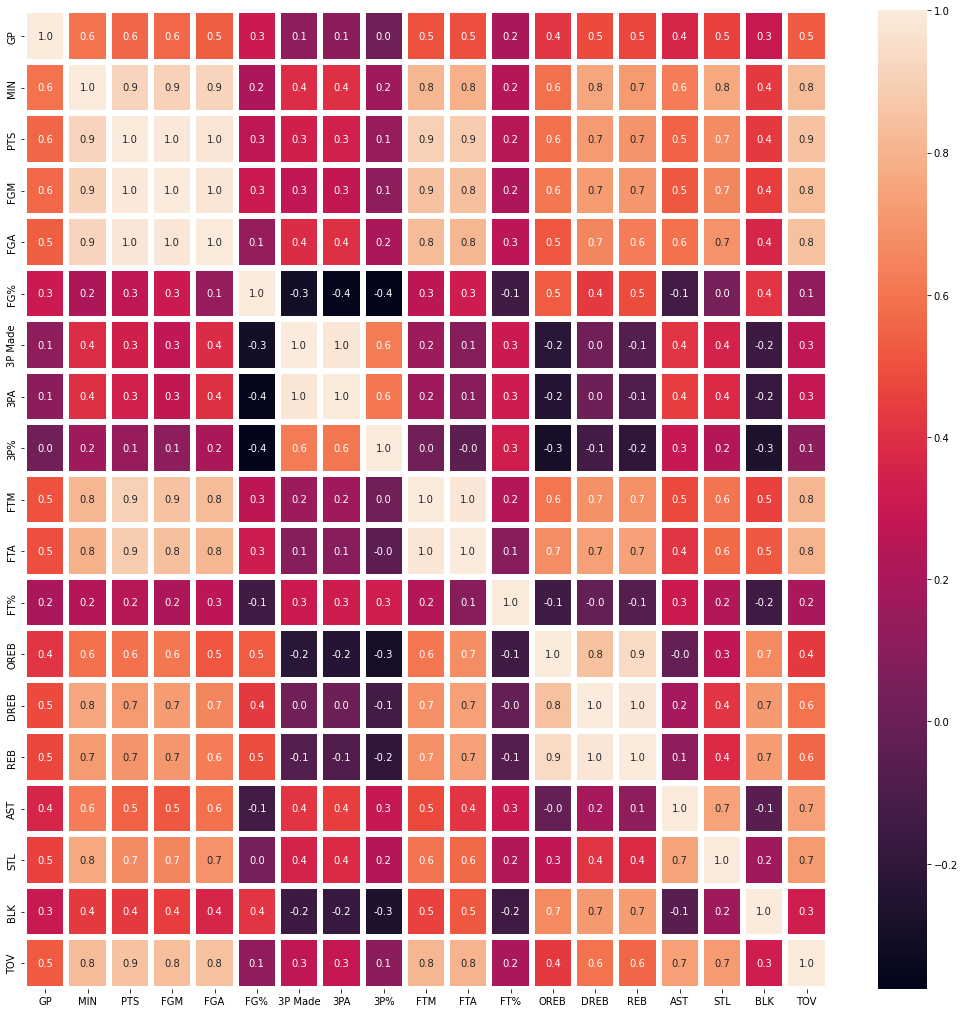

In [ ]:
'''
Use correlation to see which features are correlated.
Remove the high correlated features since they do 
not add any significant information and making 
model complex. 
'''
f,ax = plt.subplots(figsize= (18,18))
sns.heatmap(X_train.corr(),annot=True,ax=ax,fmt='.1f',linewidths=5)

In [ ]:
'''
One of the pair of the features is removed if the pair has correlation of 1.
'''
X_train = X_train.drop(['FGA','FGM','3PA','FTM','DREB'],axis=1)
test_data = test_data.drop(['FGA','FGM','3PA','FTM','DREB'],axis=1)

In [ ]:
'''
Spling the training data into training and validation dataset to
check the beahvior of the model on unseen validation data
'''
X_training, X_val,Y_training, Y_val = train_test_split(X_train,Y_train , test_size=0.1,shuffle=True)

# Model Trainings

In [ ]:
#initialize Machine learning models
model_logistic = LogisticRegression()
model_tree = DecisionTreeClassifier()
model_forest = RandomForestClassifier()
model_linearsvc = LinearSVC()
model_gauuss = GaussianNB()
mlp = MLPClassifier(hidden_layer_sizes=1, activation = "logistic")
mlp1 = MLPClassifier(hidden_layer_sizes=100, activation = "logistic")
mlp2 = MLPClassifier(hidden_layer_sizes=1000, activation = "logistic")

In [ ]:
#Fitting the machine learning models
model_logistic.fit(X_training, Y_training)
model_tree.fit(X_training, Y_training)
model_forest.fit(X_training, Y_training)
model_linearsvc.fit(X_training, Y_training)
model_gauuss.fit(X_training, Y_training)
mlp.fit(X_training, Y_training)
mlp1.fit(X_training, Y_training)
mlp2.fit(X_training, Y_training)



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=1000)

# Model Evaluation

In [ ]:
#Evaluating the model on the training data. Score function gives mean accuracy on training dataset
logistic_score = model_logistic.score(X_training, Y_training)
tree_score =  model_tree.score(X_training, Y_training)
forest_score =  model_forest.score(X_training, Y_training)
linearsvc_score =  model_linearsvc.score(X_training, Y_training)
gauss_score = model_gauuss.score(X_training, Y_training)
mlp_score = mlp.score(X_training, Y_training)
mlp1_score = mlp2.score(X_training, Y_training)
mlp2_score = mlp2.score(X_training, Y_training)


In [ ]:
#saving models scores  in dataframe and sorting them in descending order.
results = pd.DataFrame({
    'Model': [ 'Logistic Regression','Decision Tree','Random Forest','Support Vector Machines',  
               'Naive Bayes', 'mlp-1-layer','mlp-100layers','mlp-1000-layers' 
              ],
    'Score': [logistic_score, tree_score, forest_score, 
              linearsvc_score, gauss_score, mlp_score, 
              mlp1_score, mlp2_score]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.990909,Decision Tree
0.990909,Random Forest
0.709091,Logistic Regression
0.707071,Support Vector Machines
0.703030,mlp-100layers
0.703030,mlp-1000-layers
0.702020,mlp-1-layer
0.683838,Naive Bayes


In [ ]:
#Predicting the validation data for all models 
predict_logistic= model_logistic.predict(X_val)
predict_tree = model_tree.predict(X_val)
predict_forest = model_forest.predict(X_val)
predict_svmlinear = model_linearsvc.predict(X_val)
predict_gauss = model_gauuss.predict(X_val)
predictions_NN = mlp.predict(X_val)
predictions_NN1 = mlp1.predict(X_val)
predictions_NN2 = mlp2.predict(X_val)

In [ ]:
#Computing the confusion matrix
logistic = confusion_matrix(Y_val,predict_logistic)
tree = confusion_matrix(Y_val,predict_tree)
forest = confusion_matrix(Y_val,predict_forest)
svm = confusion_matrix(Y_val,predict_svmlinear)
gauss = confusion_matrix(Y_val,predict_gauss)
NN = confusion_matrix(Y_val,predictions_NN)
NN1 = confusion_matrix(Y_val,predictions_NN1)
NN2 = confusion_matrix(Y_val,predictions_NN2)

Text(0.5, 1.0, 'NN2')

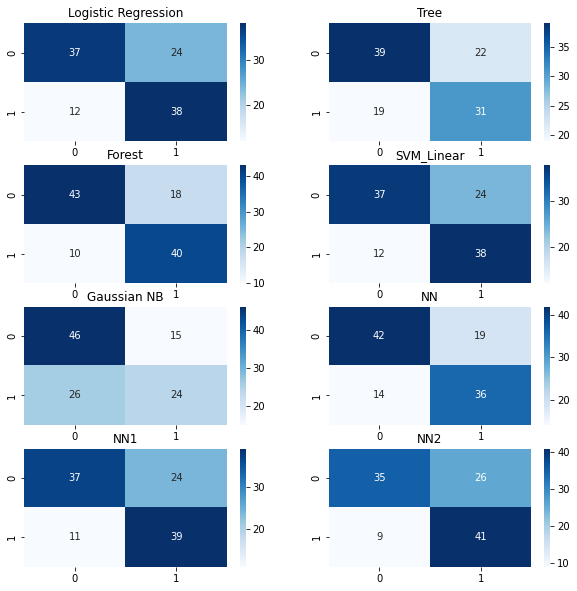

In [ ]:
#Plotting confusion matrix
fig, axs = plt.subplots(ncols=2, nrows=4,figsize=(10, 10))
logistic= sns.heatmap(logistic, annot=True,cmap='Blues', fmt='g', ax=axs[0,0])
logistic.set_title("Logistic Regression")
tree = sns.heatmap(tree, annot=True,cmap='Blues', fmt='g',ax=axs[0,1])
tree.set_title("Tree")
forest = sns.heatmap(forest, annot=True,cmap='Blues', fmt='g',ax=axs[1,0])
forest.set_title("Forest")
svm =sns.heatmap(svm, annot=True,cmap='Blues', fmt='g',ax=axs[1,1])
svm.set_title("SVM_Linear")
gauss =sns.heatmap(gauss, annot=True,cmap='Blues', fmt='g',ax=axs[2,0])
gauss.set_title("Gaussian NB")
NN=sns.heatmap(NN, annot=True,cmap='Blues', fmt='g',ax=axs[2,1])
NN.set_title("NN")
NN1 = sns.heatmap(NN1, annot=True,cmap='Blues', fmt='g',ax=axs[3,0])
NN1.set_title("NN1")
NN2 = sns.heatmap(NN2, annot=True,cmap='Blues', fmt='g',ax=axs[3,1])
NN2.set_title("NN2")


In [ ]:
#Printing the classification report.
print("Logistic Regression")
print(classification_report(Y_val,predict_logistic))
print("tree")
print( classification_report(Y_val,predict_tree))
print("forest")
print( classification_report(Y_val,predict_forest))
print("svm")
print(classification_report(Y_val,predict_svmlinear))
print("gauss")
print(classification_report(Y_val,predict_gauss))
print("NN")
print(classification_report(Y_val,predictions_NN))
print("NN1")
print(classification_report(Y_val,predictions_NN1))
print("NN2")
print(classification_report(Y_val,predictions_NN2))

Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.61      0.67        61
           1       0.61      0.76      0.68        50

    accuracy                           0.68       111
   macro avg       0.68      0.68      0.68       111
weighted avg       0.69      0.68      0.68       111

tree
              precision    recall  f1-score   support

           0       0.67      0.64      0.66        61
           1       0.58      0.62      0.60        50

    accuracy                           0.63       111
   macro avg       0.63      0.63      0.63       111
weighted avg       0.63      0.63      0.63       111

forest
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        61
           1       0.69      0.80      0.74        50

    accuracy                           0.75       111
   macro avg       0.75      0.75      0.75       111
weighted avg       0.76      0.75      0.7

In [ ]:
#Picking the best model based on classification report
best_model = RandomForestClassifier()

In [ ]:
#Training the best model
best_model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
#Making prediction on best model
prediction =  best_model.predict(test_data)

In [ ]:
#Saving the prediction on the best model in to CSV file.
results=pd.DataFrame({"label":prediction})
results.to_csv("results.csv",index=False,header=1)

In [ ]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,

In [ ]:
#Download the CSV file.
from google.colab import files
files.download('results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


# Other ideas to improve your machinea Learning models.
1.   You can use ROC and AUC ROC for model evalution.
2.   You can use cross validation which will spliting the dataset into different portion for training and validation.
3.   You can use grid search to find optimized parameter/hypder-parameter for a ML Model.
4.   You can use mutual information than correlation to know the importance of the features.
5.   You can use different UnSuprvised learning techiniques such as PCA to reduce the dimension of your dataset.







